## PYTHON 

Question: 1
    
    Write an efficient algorithm that searches for a value target in an m x n integer matrix. This matrix has the following properties:

    Integers in each row are sorted from right to left.

    The first integer of each row is greater than the last integer of the previous row.

                              Example-: 

                                        Input: matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

                                         Output: True

In [147]:
def searchMatrix(matrix, target):
    #for getting row and column nos
    row = 0
    col = len(matrix[0]) - 1
    
    while row < len(matrix) and col >= 0:
        if matrix[row][col] == target:
            return True
        elif matrix[row][col] > target:
            col -= 1
        else:
            row += 1
            
    return False

In [148]:
matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]]

In [149]:
searchMatrix(matrix,target=3)

True

### question 2

In [150]:
def find_max_len(text):
    word_freq = {}
    for word in text.lower().split():
        if word not in word_freq:
            word_freq[word] = 0
        word_freq[word] += 1
    
    max_freq = 0
    res = 0
    for word, freq in word_freq.items():
        if freq > max_freq:
            max_freq = freq
            res = len(word)
    return res



In [151]:
text = "write write write all the number from from from 1 to 100" 
print(find_max_len(text))

5


In [152]:
text = "hello hello hello hell hellooo hellooo helo helo helo"
print(find_max_len(text))
explanation = "hello and helo have same word frequency but length of hello is greater"

5


In [153]:
text = "this is a test string for our program"  
print(find_max_len(text))
Explanation = "The most frequent words this and for , length of this is greater."

4


## Machine Learning

### Q2.2

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')

### Sample Code Snippets

In [155]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00


In [156]:
col_describe = {}
for col in df.columns:
    unique = len(df[col].unique())
    nulls = df[col].isnull().sum()
    dtype = df[col].dtype
    col_describe[col] = unique
    col_describe[col+"_null"] = nulls
    col_describe[col+ "_dtype"] = dtype
    
col_describe            ##hence we have both null values and many unique values thus a possibility of binning the many unique values

{'area_type': 4,
 'area_type_null': 0,
 'area_type_dtype': dtype('O'),
 'availability': 81,
 'availability_null': 0,
 'availability_dtype': dtype('O'),
 'location': 1306,
 'location_null': 1,
 'location_dtype': dtype('O'),
 'size': 32,
 'size_null': 16,
 'size_dtype': dtype('O'),
 'society': 2689,
 'society_null': 5502,
 'society_dtype': dtype('O'),
 'total_sqft': 2117,
 'total_sqft_null': 0,
 'total_sqft_dtype': dtype('O'),
 'bath': 20,
 'bath_null': 73,
 'bath_dtype': dtype('float64'),
 'balcony': 5,
 'balcony_null': 609,
 'balcony_dtype': dtype('float64'),
 'price': 1994,
 'price_null': 0,
 'price_dtype': dtype('float64')}

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [158]:
df = df.drop(['area_type','society','balcony','availability'], axis='columns')

In [159]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [160]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce').fillna(0).astype(int)

In [161]:
df['size'] = df['size'].str.split().str[0]
df['size'] = pd.to_numeric(df['size'],errors='coerce').fillna(0).astype(int)

In [162]:
df.dtypes

location       object
size            int32
total_sqft      int32
bath          float64
price         float64
dtype: object

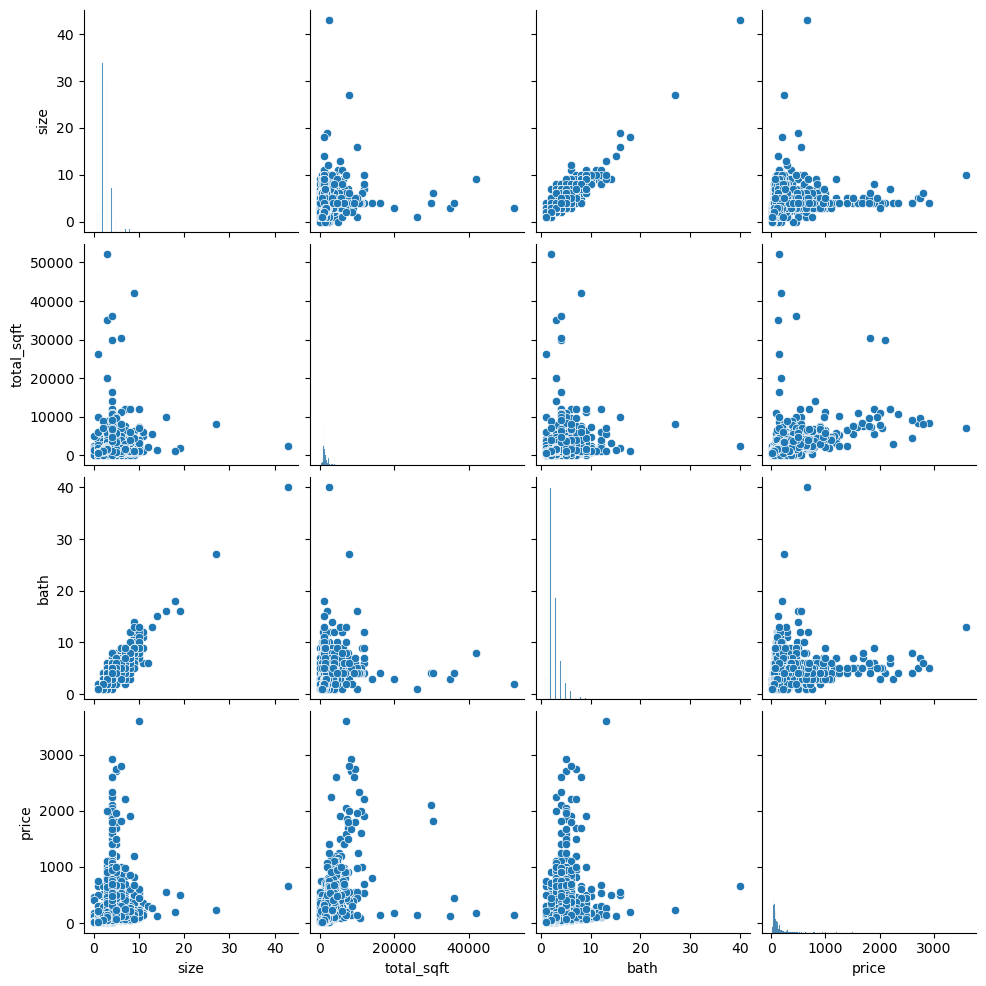

In [163]:
sns.pairplot(df)

In [176]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [164]:
y = df['price']

In [173]:
X = df.drop(['location', 'price'],axis=1)
X['bath']=X['bath'].fillna(1)
X.isna().sum()

size          0
total_sqft    0
bath          0
dtype: int64

In [166]:
from sklearn.svm import SVR

In [167]:
model = SVR()

In [175]:
model.fit(X,y)

SVR()